# 3D Contour Plots

In [68]:
%matplotlib inline
%reset -f
import fnmatch
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import datetime as dt 
import scipy.signal
import matplotlib.ticker as mticker
import math
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

In [70]:
# %config InlineBackend.figure_formats = ['svg']
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 1
plt.rcParams['figure.dpi'] = 100

In [129]:
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'

fname = os.path.join(image_path+'3d\\','[!m]*')
fileL = glob.glob(fname) #list of files
lenRa = len(fileL)
file2 = [float(file.replace(image_path+'3d\\output-ISORa','').replace('-256.pvd.png','')) for file in fileL]
fileL = [x for _, x in sorted(zip(file2, fileL))]
nameRa = [file.replace(image_path+'3d\\output-ISORa','').replace('-256.pvd.png','') for file in fileL]

images = [];
for i in range(lenRa):
    images.append(Image.open(fileL[i]))
    width, height = images[i].size
    left = 636; right = 1893
    top = 198; bottom = 1455
    images[i] = images[i].crop((left, top, right, bottom))
    images[i] = np.asarray(images[i])

In [64]:
# images[i].save(image_path+'3d\\geeks.png')

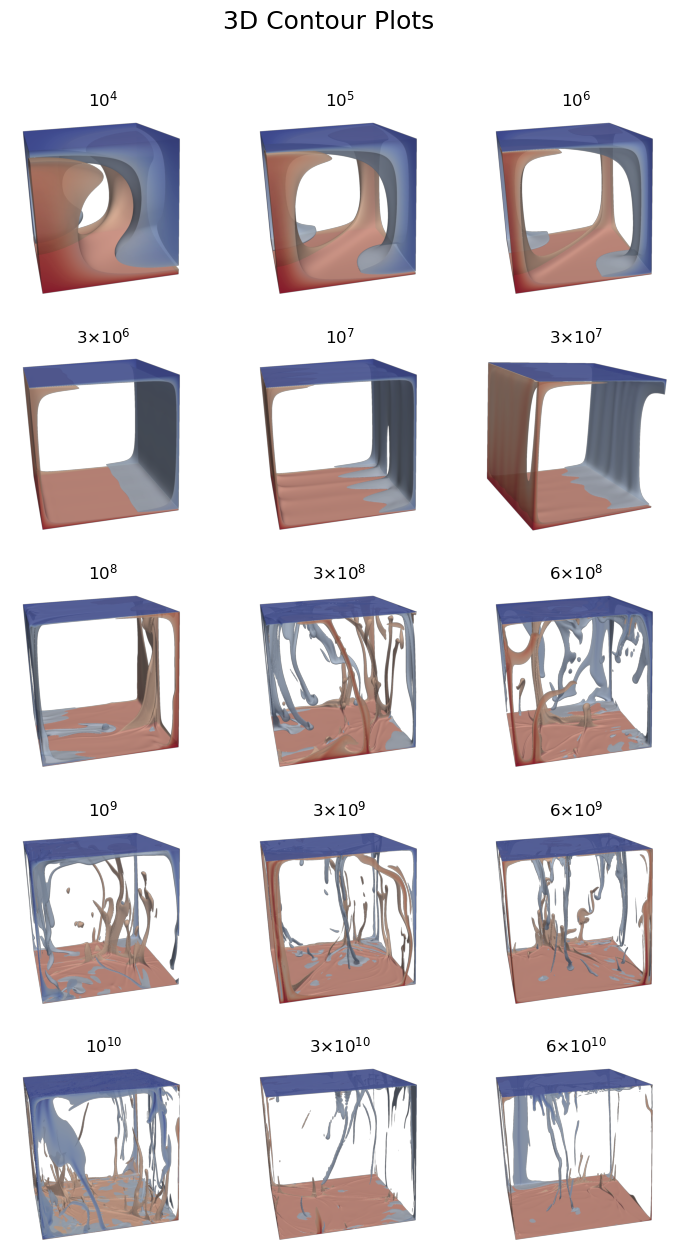

In [133]:
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(9,15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5,3),  # creates 5x3 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
plt.suptitle("3D Contour Plots", fontsize=18,y=0.95)
i = 0;
for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title('{}'.format(fmt(float(nameRa[i]))))
    i+=1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

# plt.show()

# for i in range(lenRa):
#     ax = plt.subplot(5,3, i + 1)
#     plt.pcolormesh(x, y, T, shading='auto',vmin=0,vmax=1)
# #     plt.pcolormesh(x, y, T, cmap='coolwarm', shading='auto')
#     ax.set_title('{}'.format(fmt(float(RaU[i]))))
# #     plt.xlabel('{}'.format(fmt(float(RaU[i]))))
# #     cax = plt.axes([0.11, -0.03, 0.8,0.05])
# #     plt.colorbar(orientation='horizontal',ticks=np.linspace(0, 1, 6));

# # fig.text(-0.01, 0.5, 'Y', va='center', rotation='vertical', fontsize=14)
# # fig.text(0.5, -0.01, 'X', va='center', fontsize=14)
# fig.tight_layout()
# # cax = plt.axes([1, 0, 0.02, 0.95])
# # plt.colorbar(cax=cax)

# plt.savefig(image_path + 'all 3d contour.png',pad_inches=0.1,bbox_inches='tight');

In [140]:
def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, main_title=None, grid=True,\
                    num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    fmt = mticker.FuncFormatter(g)
    
    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    plt.suptitle(main_title, fontsize=18,y=1.0)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title('{}'.format(fmt(float(title)))) 
        list_axes[i].grid(grid)
        list_axes[i].axis('off')

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)
    fig.tight_layout()
    plt.savefig(image_path + 'all 3d contour.png',pad_inches=0.1,bbox_inches='tight');
    _ = plt.show()

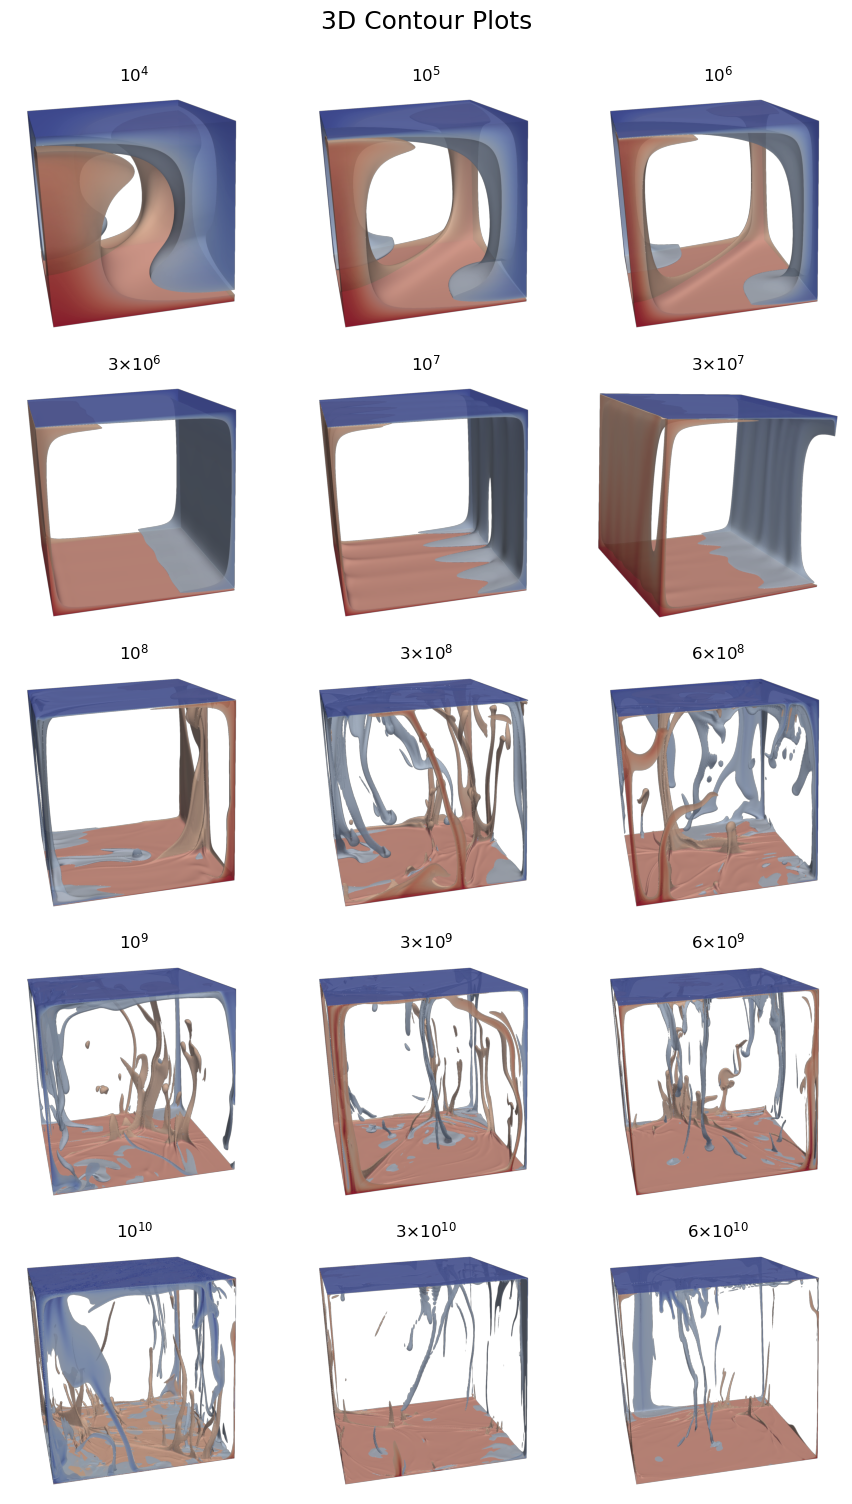

In [141]:
my_image = show_image_list(list_images=images, list_titles=nameRa, num_cols=3, figsize=(9,15), main_title = "3D Contour Plots",
                grid=False, title_fontsize=18)